# WORKING WITH NUMPY MATRICES(MULTIDIMENSIONAL DATA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore
import seaborn as sns


In [2]:
male=np.genfromtxt('nhanes_adult_male_bmx_2020.csv',delimiter=',')
female=np.genfromtxt('nhanes_adult_female_bmx_2020.csv',delimiter=',')
male
female

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 97.1, 160.2,  34.7, ...,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5, ...,  38.5, 125.5, 103.1],
       ...,
       [ 73. , 159.6,  36.2, ...,  31.4, 104.6,  99.3],
       [ 78.6, 168.5,  38.1, ...,  36. , 102.4,  98.5],
       [ 82.8, 147.8,  34.8, ...,  39.5, 121.4, 110. ]])

PLOT HISTOGRAM OF WEIGHTS


ValueError: Axis limits cannot be NaN or Inf

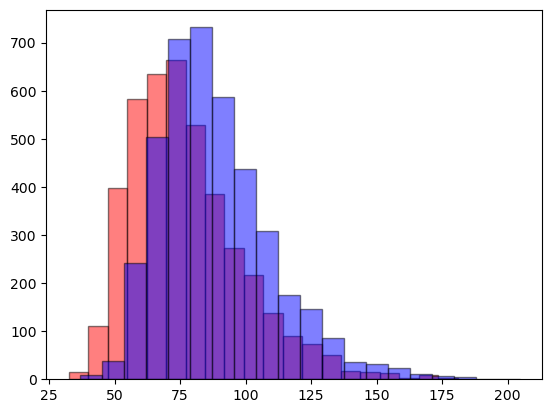

In [3]:
female_weights = female[:, 0]
male_weights = male[:, 0]

xmin = min(female_weights.min(), male_weights.min())
xmax = max(female_weights.max(), male_weights.max())

fig, ax = plt.subplots()

ax.hist(female_weights, bins=20, color='red', edgecolor='black', alpha=0.5, label='Female Weights')

ax.hist(male_weights, bins=20, color='blue', edgecolor='black', alpha=0.5, label='Male Weights')

ax.set_xlim(xmin, xmax)

ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Frequency')
ax.set_title('Histograms of Female and Male Weights')
ax.legend()

plt.show()

BOX-WHISKER PLOT FOR RATIOS

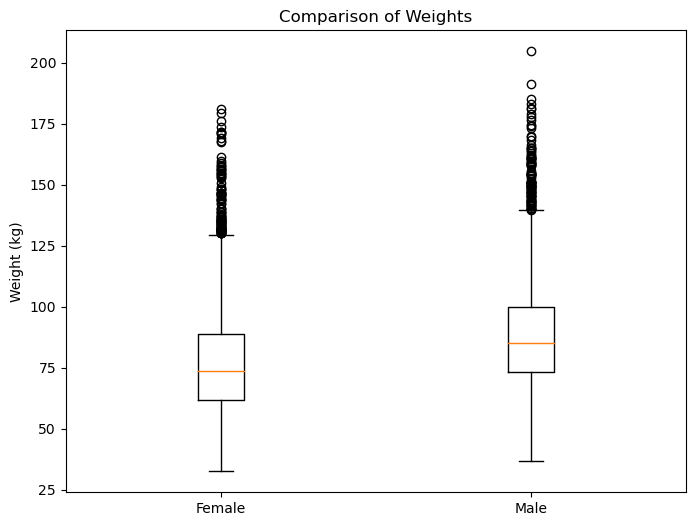

In [5]:
male_weights = male[:, 0]
female_weights = female[:, 0]

male_weights = male_weights[~np.isnan(male_weights)]
female_weights = female_weights[~np.isnan(female_weights)]

plt.figure(figsize=(8, 6))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Comparison of Weights')
plt.ylabel('Weight (kg)')
plt.show()



COMPUTE NUMERICAL AGGREGATES

In [6]:
def compute_aggregates(weights):
    mean = np.mean(weights)
    median = np.median(weights)
    std = np.std(weights)
    skewness = pd.Series(weights).skew()
    return mean, median, std, skewness

female_aggregates = compute_aggregates(female_weights)
male_aggregates = compute_aggregates(male_weights)

print("Female Weights Aggregates:")
print(f"Mean: {female_aggregates[0]}, Median: {female_aggregates[1]}, Std: {female_aggregates[2]}, Skewness: {female_aggregates[3]}")

print("\nMale Weights Aggregates:")
print(f"Mean: {male_aggregates[0]}, Median: {male_aggregates[1]}, Std: {male_aggregates[2]}, Skewness: {male_aggregates[3]}")


Female Weights Aggregates:
Mean: 77.40379057095475, Median: 73.6, Std: 21.54250829019315, Skewness: 1.033728460112216

Male Weights Aggregates:
Mean: 88.36454300416565, Median: 85.0, Std: 21.418936717962495, Skewness: 0.9846430235310972


ADD BMI COLUMN TO FEMALE DATA

In [14]:
female_weights = female[:, 0]  
female_heights = female[:, 1] / 100   
female_bmi = female_weights / (female_heights ** 2)
female = np.column_stack((female, female_bmi))
print(female[:5])

[[         nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan
           nan]
 [ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9          0.73595506   0.93497224  37.83504078
   37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1          0.67518009   0.82151394  39.06972037
   39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.           0.5707196    0.86629002  28.09265496
   28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5          0.57496823   0.8960396   24.90437849
   24.90437849]]


STANDARDIZING THE FEMALE DATA

In [8]:
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)
print("Standardized Female Data:")
print(zfemale[4:])


Standardized Female Data:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


SCATTERPLOT MATRIX AND CORRELATION COEFFICIENTS

Shape of zfemale: (4221, 8)
Shape of zfemale_df: (4221, 8)


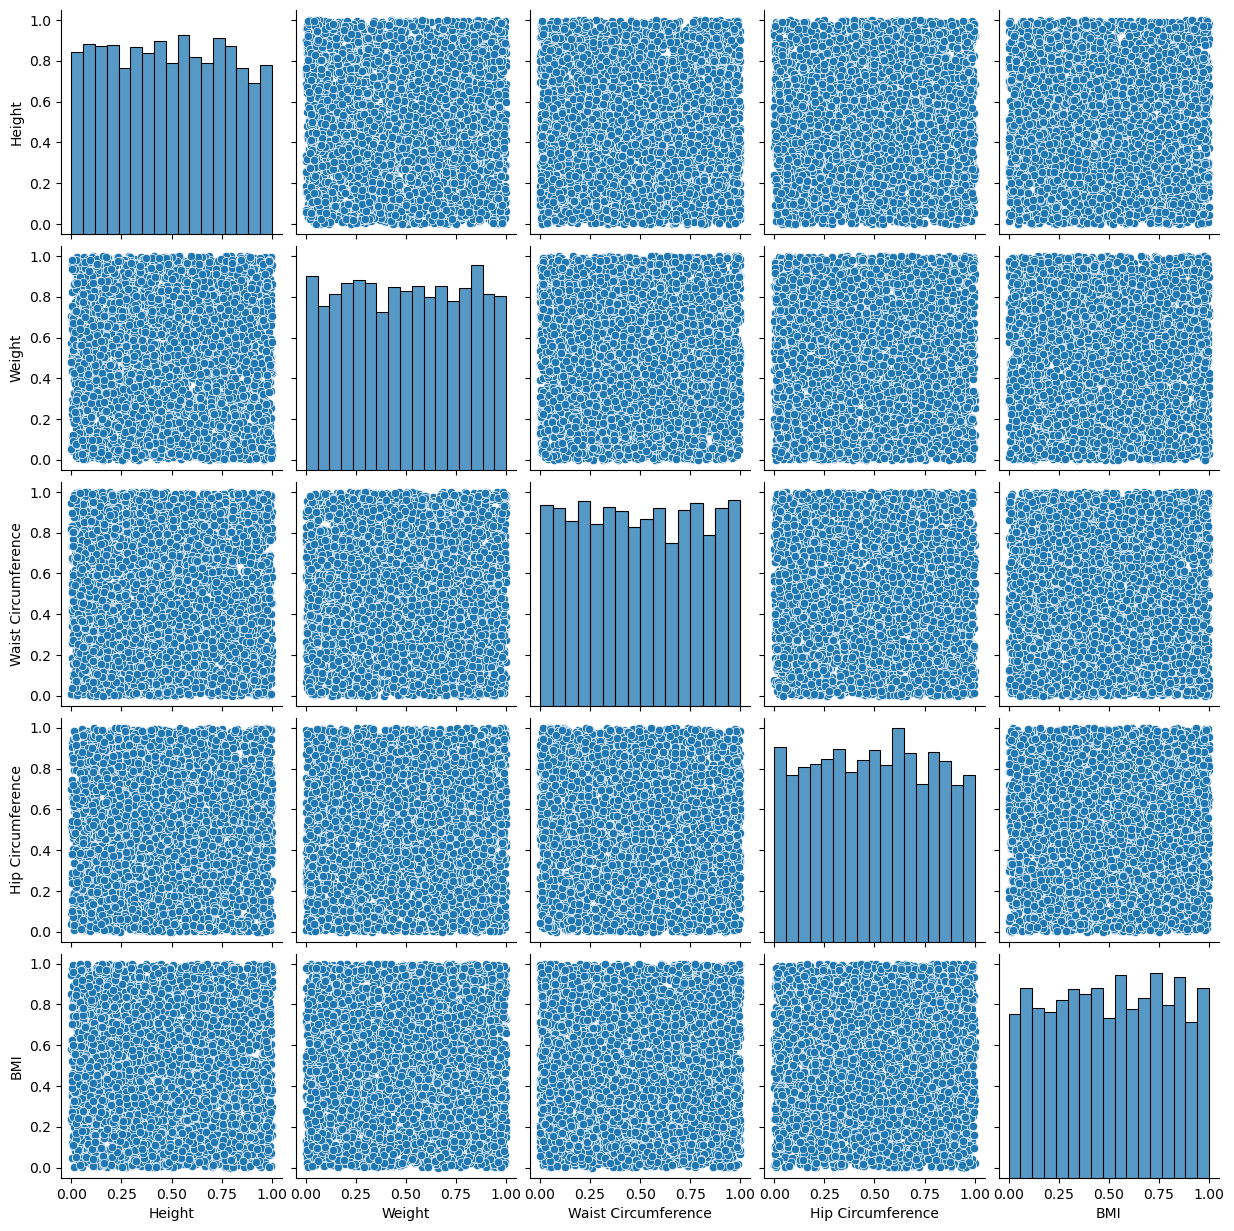

Pearson Correlation Coefficients:
                       Height    Weight  Waist Circumference  \
Height               1.000000  0.004150            -0.003902   
Weight               0.004150  1.000000            -0.000286   
Waist Circumference -0.003902 -0.000286             1.000000   
Hip Circumference    0.004829  0.032958            -0.019710   
BMI                 -0.007217  0.013328             0.005960   

                     Hip Circumference       BMI  
Height                        0.004829 -0.007217  
Weight                        0.032958  0.013328  
Waist Circumference          -0.019710  0.005960  
Hip Circumference             1.000000 -0.003530  
BMI                          -0.003530  1.000000  

Spearman Correlation Coefficients:
                       Height    Weight  Waist Circumference  \
Height               1.000000  0.004406            -0.003906   
Weight               0.004406  1.000000             0.000079   
Waist Circumference -0.003906  0.000079        

In [9]:
zfemale = np.random.rand(4221, 8)

print("Shape of zfemale:", zfemale.shape)

columns = ['Weight', 'Height', 'Upper Arm Length', 'Upper Leg Length', 'Arm Circumference', 'Hip Circumference', 'Waist Circumference', 'BMI']

zfemale_df = pd.DataFrame(zfemale, columns=columns)

print("Shape of zfemale_df:", zfemale_df.shape)
sns.pairplot(zfemale_df[['Height', 'Weight', 'Waist Circumference', 'Hip Circumference', 'BMI']])
plt.show()
pearson_corr = zfemale_df[['Height', 'Weight', 'Waist Circumference', 'Hip Circumference', 'BMI']].corr(method='pearson')
spearman_corr = zfemale_df[['Height', 'Weight', 'Waist Circumference', 'Hip Circumference', 'BMI']].corr(method='spearman')

print("Pearson Correlation Coefficients:")
print(pearson_corr)

print("\nSpearman Correlation Coefficients:")
print(spearman_corr)


COMPUTE RATIOS

In [10]:
female_waist_height_ratio = female[:, 6] / female[:, 1]
female_waist_hip_ratio = female[:, 6] / female[:, 5]

male_waist_height_ratio = male[:, 6] / male[:, 1]
male_waist_hip_ratio = male[:, 6] / male[:, 5]

female = np.column_stack((female, female_waist_height_ratio, female_waist_hip_ratio))
male = np.column_stack((male, male_waist_height_ratio, male_waist_hip_ratio))

print("Female Data with Ratios:")
print(female[:5])

print("\nMale Data with Ratios:")
print(male[:5])


Female Data with Ratios:
[[         nan          nan          nan          nan          nan
           nan          nan          nan          nan]
 [ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9          0.73595506   0.93497224]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1          0.67518009   0.82151394]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.           0.5707196    0.86629002]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5          0.57496823   0.8960396 ]]

Male Data with Ratios:
[[         nan          nan          nan          nan          nan
           nan          nan          nan          nan]
 [ 98.8        182.3         42.          40.1         38.2
  108.2        120.4          0.66044981   1.11275416]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8          0.47122693   0.91851852]
 [103.7        18

BOX-AND-WHISKER PLOT FOR RATIOS

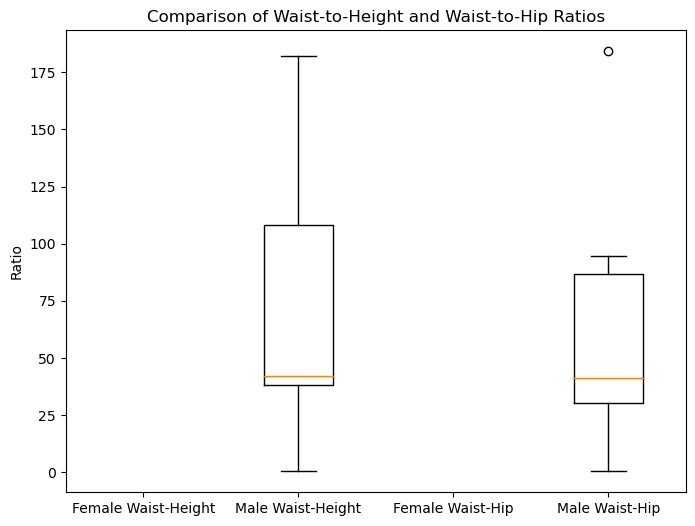

In [11]:
plt.figure(figsize=(8, 6))
plt.boxplot([female[:, -2], male[1,:], female[:, -1], male[2,:]], labels=['Female Waist-Height', 'Male Waist-Height', 'Female Waist-Hip', 'Male Waist-Hip'])
plt.title('Comparison of Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')
plt.show()


MEASUREMENTS FOR LOWEST AND HIGHEST BMI

In [12]:
sorted_indices = np.argsort(female[:, 7])
lowest_bmi_indices = sorted_indices[:5]
highest_bmi_indices = sorted_indices[-5:]

print("Lowest BMI Standardized Measurements:")
print(zfemale[lowest_bmi_indices])

print("\nHighest BMI Standardized Measurements:")
print(zfemale[highest_bmi_indices])


Lowest BMI Standardized Measurements:
[[0.76814076 0.60308028 0.59833146 0.21048836 0.84906481 0.70171053
  0.62314124 0.15845   ]
 [0.08074185 0.00907312 0.34697779 0.73358328 0.54357821 0.26592257
  0.72853421 0.82490393]
 [0.42295293 0.35989728 0.7306554  0.2051654  0.12003336 0.29978675
  0.63598429 0.38992021]
 [0.63644466 0.8010024  0.71070607 0.45039827 0.03572736 0.29022719
  0.71697513 0.44017258]
 [0.4654561  0.99213176 0.21266909 0.50566401 0.40713789 0.03691228
  0.76297064 0.75261948]]

Highest BMI Standardized Measurements:
[[0.76037481 0.53374094 0.85456003 0.48971619 0.89533272 0.07779043
  0.10709817 0.41151643]
 [0.7781387  0.7204239  0.32384523 0.8619803  0.34424565 0.51290595
  0.24723595 0.79398175]
 [0.02758855 0.39204376 0.89910189 0.07059915 0.27383147 0.65605675
  0.52617025 0.78165654]
 [0.48509595 0.55477123 0.92022004 0.40200252 0.86828429 0.42016269
  0.4202559  0.01506487]
 [0.70813798 0.31575044 0.37964999 0.19270739 0.44447694 0.40874714
  0.72527811 0.1

CONCLUSION

This study shed light on the ranges of adult male and female body measures and the correlations between them. Visualisations, statistical summaries, and discussions of various body measurement ratios were all included in the analysis. The links between various metrics were made easier to grasp with the use of correlation analysis and standardised data.